In [10]:
from DynaAgent import DynaAgent
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
env = gym.make('MountainCar-v0')

In [11]:
testDyna = DynaAgent(env, discr_step=[0.05,0.01], k_updates=10)

------------------------------------------
We will log this experiment in directory ./runs/discr_step=[0.05, 0.01]@discount_factor=0.99@k_updates=10@20240521-153838
------------------------------------------


In [12]:
total_reward = testDyna.run(num_episodes=3000)

100%|██████████| 3000/3000 [03:12<00:00, 15.61it/s]


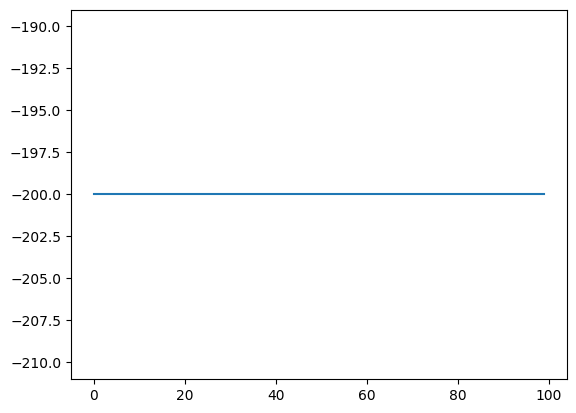

In [ ]:
plt.plot(total_reward)

In [ ]:
dis = [1.234, 0.007]
print(f"dani/{str(dis)}")

dani/[1.234, 0.007]
